In [1]:
import pandas as pd
import numpy as np

# Upload the file from local system
from google.colab import files
uploaded = files.upload()

# Load the dataset, tab-separated
df = pd.read_csv('marketing_campaign.csv', sep='\t')

# Quick overview
df.head()

Saving marketing_campaign.csv to marketing_campaign.csv


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [4]:
df.isnull().sum().sort_values(ascending=False)

,0
Income,24
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [5]:
print(df['Education'].value_counts())
print(df['Marital_Status'].value_counts())

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [6]:
df['Dt_Customer'].head()

,Dt_Customer
0,2012-09-04
1,2014-03-08
2,2013-08-21
3,2014-02-10
4,2014-01-19


In [7]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [8]:
# Group uncommon or invalid values into 'Other'
df['Marital_Status'] = df['Marital_Status'].replace({
    'Alone': 'Single',
    'Absurd': 'Other',
    'YOLO': 'Other'
})

In [9]:
# Rename '2n Cycle' to a more common label
df['Education'] = df['Education'].replace({
    '2n Cycle': 'Undergraduate'
})

In [10]:
print(df['Marital_Status'].value_counts())
print(df['Education'].value_counts())

Marital_Status
Married     864
Together    580
Single      483
Divorced    232
Widow        77
Other         4
Name: count, dtype: int64
Education
Graduation       1127
PhD               486
Master            370
Undergraduate     203
Basic              54
Name: count, dtype: int64


In [11]:
df['Age'] = 2025 - df['Year_Birth']

In [12]:
df['Children'] = df['Kidhome'] + df['Teenhome']

In [13]:
df['Customer_Tenure_Years'] = (pd.Timestamp('2025-01-01') - df['Dt_Customer']).dt.days // 365

In [14]:
df[['Year_Birth', 'Age', 'Kidhome', 'Teenhome', 'Children', 'Dt_Customer', 'Customer_Tenure_Years']].head()

,Year_Birth,Age,Kidhome,Teenhome,Children,Dt_Customer,Customer_Tenure_Years
0,1957,68,0,0,0,2012-09-04,12
1,1954,71,1,1,2,2014-03-08,10
2,1965,60,0,0,0,2013-08-21,11
3,1984,41,1,0,1,2014-02-10,10
4,1981,44,1,0,1,2014-01-19,10


In [15]:
median_income = df['Income'].median()
df['Income'] = df['Income'].fillna(median_income)

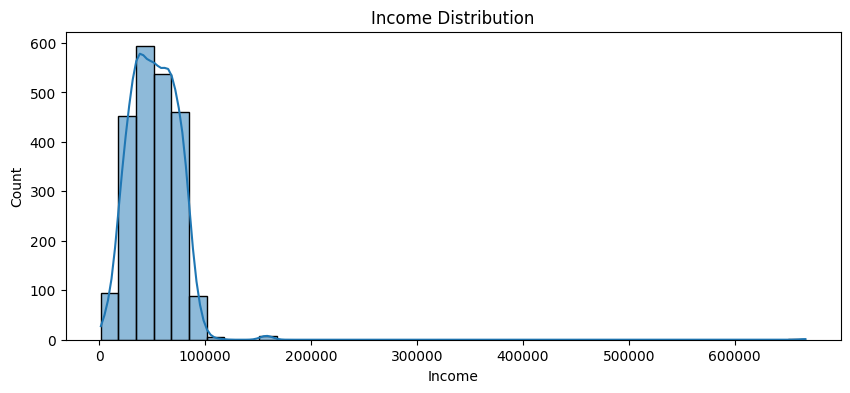

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.histplot(df['Income'], bins=40, kde=True)
plt.title("Income Distribution")
plt.show()

In [17]:
df['Income'].describe()

,Income
count,2240.000000
mean,52237.975446
std,25037.955891
min,1730.000000
25%,35538.750000
50%,51381.500000
75%,68289.750000
max,666666.000000


In [18]:
df[df['Income'] > 200000][['ID', 'Income']]

,ID,Income
2233,9432,666666.0


In [19]:
df = df[df['Income'] < 200000]

In [20]:
df = df[df['Income'] < 200000]

In [21]:
spending_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

df['Total_Spent'] = df[spending_cols].sum(axis=1)

In [22]:
df[['Income', 'Total_Spent']].describe()

,Income,Total_Spent
count,2239.000000,2239.000000
mean,51963.554712,606.041090
std,21410.672116,602.274089
min,1730.000000,5.000000
25%,35533.500000,69.000000
50%,51381.500000,396.000000
75%,68277.500000,1046.000000
max,162397.000000,2525.000000


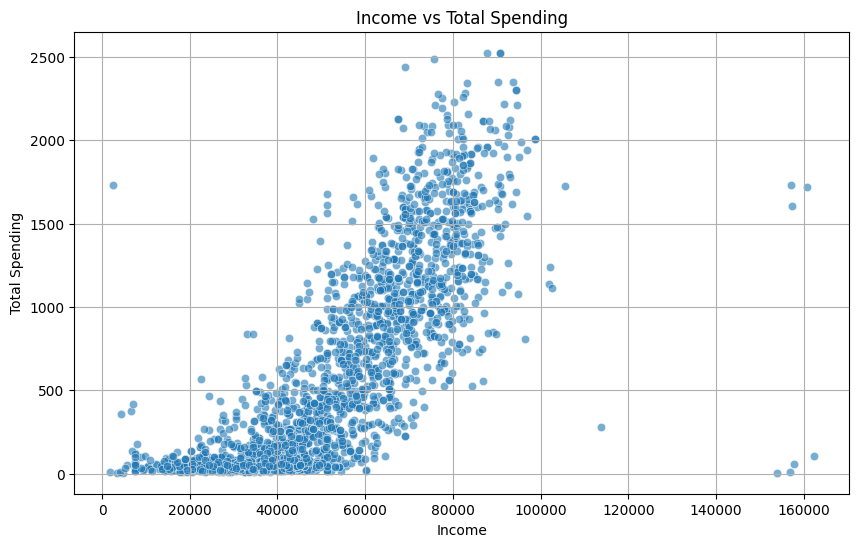

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Total_Spent', alpha=0.6)
plt.title('Income vs Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.grid(True)
plt.show()

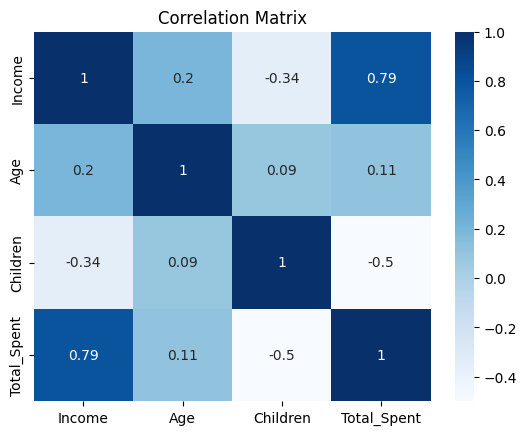

In [24]:
correlation = df[['Income', 'Age', 'Children', 'Total_Spent']].corr()
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [25]:
features = df[['Income', 'Total_Spent', 'Age', 'Children']]

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

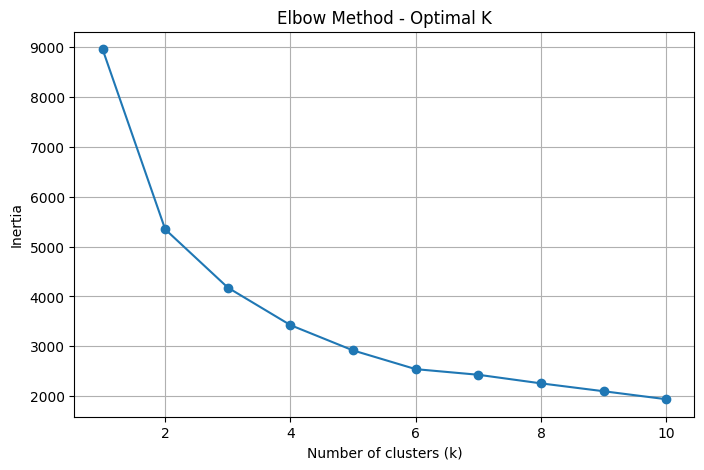

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Optimal K')
plt.grid(True)
plt.show()

In [28]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_features)

In [29]:
df.groupby('Segment')[['Income', 'Total_Spent', 'Age', 'Children']].mean()

,Income,Total_Spent,Age,Children
Segment,,,,
0,32540.449224,148.541608,47.792666,0.850494
1,59509.910072,726.665468,67.370504,0.771583
2,77239.043021,1435.068834,52.766730,0.269598
3,43884.015521,215.172949,59.616408,2.117517


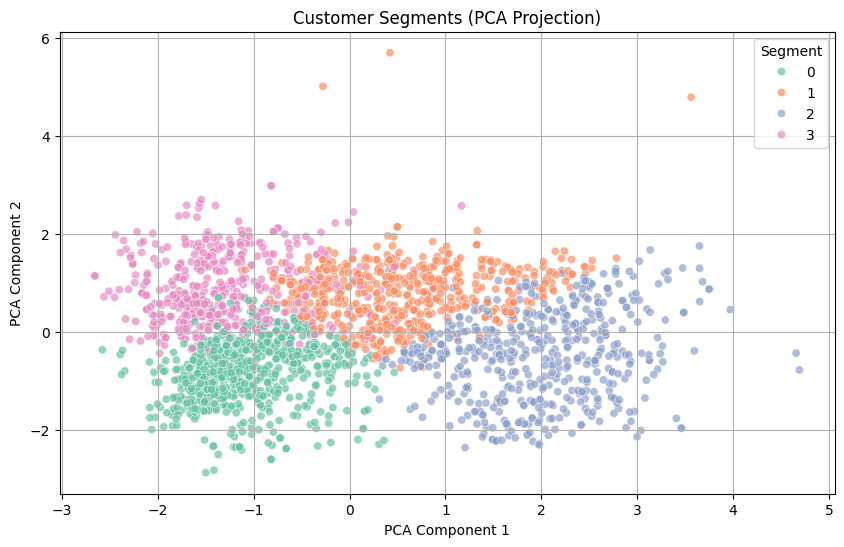

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1],
                hue=df['Segment'], palette='Set2', alpha=0.7)
plt.title('Customer Segments (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Segment')
plt.grid(True)
plt.show()